In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [5]:
def filter_columns(df, include_strings):
    """
    Filter DataFrame columns containing any of the strings in include_strings.
    
    Args:
    df (pandas.DataFrame): Input DataFrame.
    include_strings (list): List of strings that need to be included in the column names.
    
    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    filtered_columns = []
    for col in df.columns:
        if any(include_string in col.lower() for include_string in include_strings):
            filtered_columns.append(col)
    return df[filtered_columns]

In [6]:
df = filter_columns(df, include_strings=['fwb'])

In [7]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [8]:
def drop_negative_values(df):
    """
    Drop all values in the DataFrame that are less than 0.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with negative values dropped.
    """
    df_without_null = df[df >= 0]
    print(len(df)-len(df_without_null.dropna()))
    return df_without_null.dropna()

In [9]:
df = drop_negative_values(df)

19


In [10]:
target_column = [col for col in df.columns if 'score' in col.lower()]
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train = train_set.drop(columns=target_column, errors='ignore')
train_labels = train_set[target_column]

test = test_set.drop(columns=target_column, errors='ignore')
test_labels = test_set[target_column]

# Model 1: Linear Reg

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(np.array(train_labels), predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.8321200176317736

In [13]:
scores = cross_val_score(lin_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [14]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [2.7591169  2.81719053 2.69408479 2.89161287 3.11142801 2.85048284
 2.66795585 2.72331682 2.66914356 3.14585575]
Mean: 2.8330187934266045
Standard deviation: 0.16439798926184856


# 2. Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train, train_labels)

DecisionTreeRegressor()

In [16]:
predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(train_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8129826302133111

In [17]:
scores = cross_val_score(tree_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [18]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [2.30291784 2.42086407 2.40177637 2.59326814 2.60894723 2.44150848
 2.28341934 2.66596056 2.641336   2.6098647 ]
Mean: 2.496986274952314
Standard deviation: 0.13606867301447148


# 3.Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train, train_labels)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [20]:
predictions = forest_reg.predict(train)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.9870499230891634


In [21]:
scores = cross_val_score(forest_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores)

Scores: [1.64721592 1.67520695 1.7380387  1.62452418 1.89117778 1.76891335
 1.62581774 1.69819946 2.09212551 1.98609854]
Mean: 1.7747318118573658
Standard deviation: 0.15398538764175806


# 4. ANN Models

Epoch 1/100


C:\Users\minhbpham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 766.4536 - rmse: 22.8453 - val_loss: 82.4675 - val_rmse: 8.8970
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 89.3772 - rmse: 9.3401 - val_loss: 66.1651 - val_rmse: 7.9530
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 77.9774 - rmse: 8.6851 - val_loss: 53.9618 - val_rmse: 7.2057
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 64.4828 - rmse: 7.8810 - val_loss: 36.7111 - val_rmse: 5.9499
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 55.4073 - rmse: 7.2745 - val_loss: 23.4903 - val_rmse: 4.7614
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38.1615 - rmse: 6.0744 - val_loss: 14.4685 - val_rmse: 3.7469
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30.8320 - rmse: 5.4892 - val_loss: 10.3976 - val_rmse: 3.1839
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24.5051 - rmse: 4.9079 - val_loss: 7.9405 - val_rmse: 2.7939
Epoch 9/100
128/128 ━━━━━━━

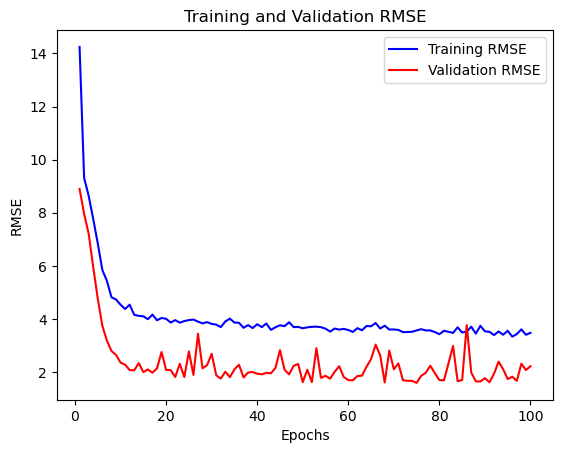

In [26]:
# Define a custom metric function for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Define a function to create the model
def create_model():
    model = Sequential([
        Dense(782, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 782 neurons and ReLU activation
        Dropout(0.314),  # Dropout rate of 0.314
        Dense(501, activation='relu'),  # Hidden layer with 501 neurons and ReLU activation
        Dropout(0.314),  # Dropout rate of 0.314
        Dense(1, activation='linear')  # Output layer for numerical prediction
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Using MSE loss for regression and MSE as a metric
    return model

# Step 2: Define the model
model = create_model()

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Using MSE loss for regression and RMSE as a metric

# Step 4: Train the model
history = model.fit(train, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Extract RMSE values from history
train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(train_rmse) + 1)

# Plot RMSE for training and validation data
plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [27]:
# Assuming train and train_labels are defined (e.g., train is a pandas DataFrame, train_labels is a pandas Series)
# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
for train_indices, val_indices in kfold.split(train):
    X_train, X_val = train.iloc[train_indices], train.iloc[val_indices]
    y_train, y_val = train_labels.iloc[train_indices], train_labels.iloc[val_indices]
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on validation data
    mse = model.evaluate(X_val, y_val, verbose=0)[0]
    mse_scores.append(mse)

# Display MSE scores
print("MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(mse_scores)))

C:\Users\minhbpham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\minhbpham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\minhbpham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
 

MSE scores: [2.946643590927124, 2.0541350841522217, 7.655889987945557, 2.5458085536956787, 5.400234222412109, 6.141873359680176, 3.1134567260742188, 3.420313835144043, 3.2026307582855225, 4.411251544952393]
Mean MSE: 4.089223766326905
Root Mean Squared Error (RMSE): 2.022182921084763
